### Chapter 9 Exercise 1 

1.

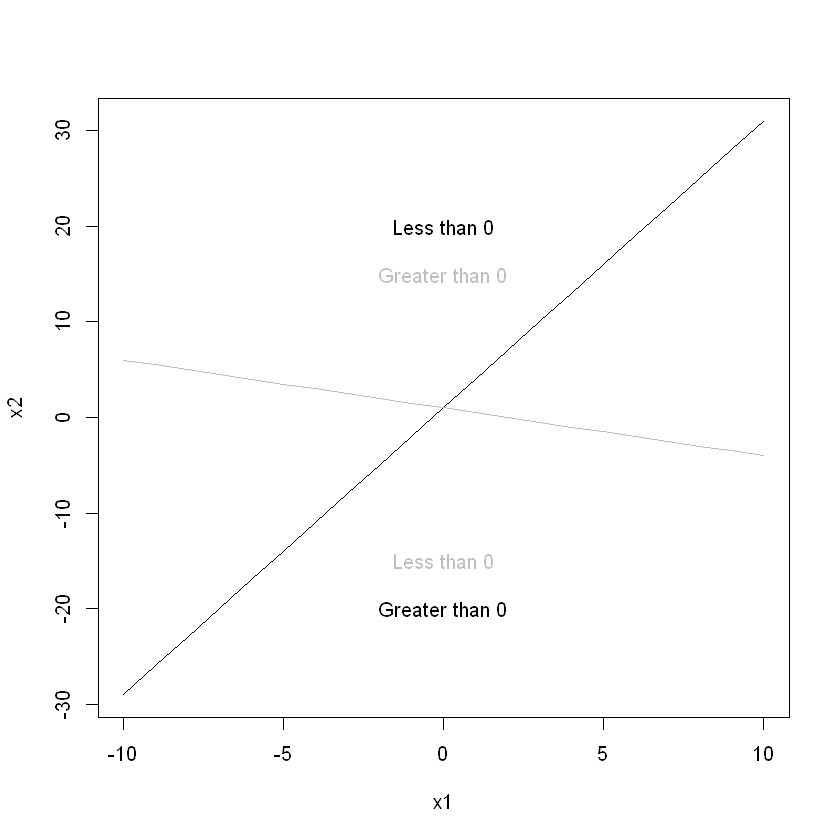

In [23]:
x1 <- -10:10
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "black")
text(c(0), c(-20), "Greater than 0", col = "black")
text(c(0), c(20), "Less than 0", col = "black")
lines(x1, 1 - x1/2, col = "grey")
text(c(0), c(-15), "Less than 0", col = "grey")
text(c(0), c(15), "Greater than 0", col = "grey")

### Exercise 2 

(a) 


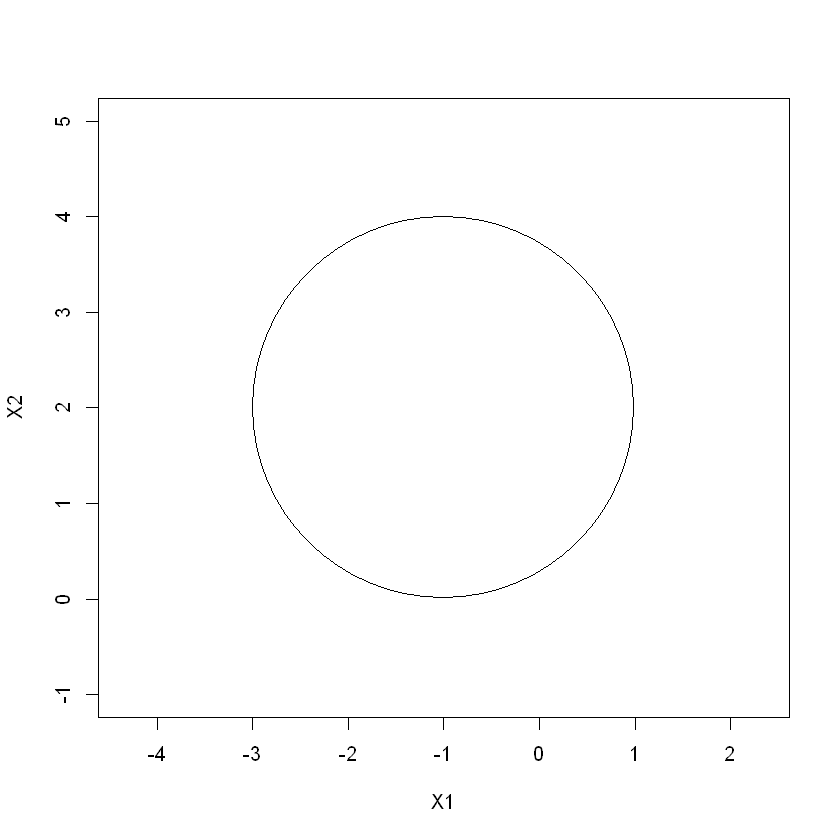

In [24]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

### b

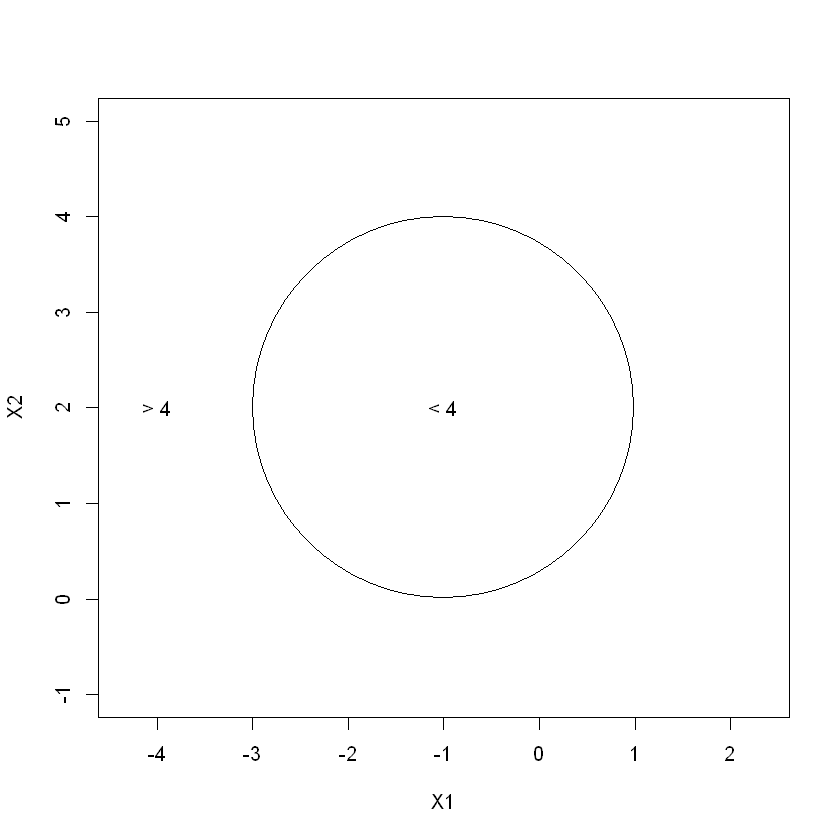

In [25]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

#### c

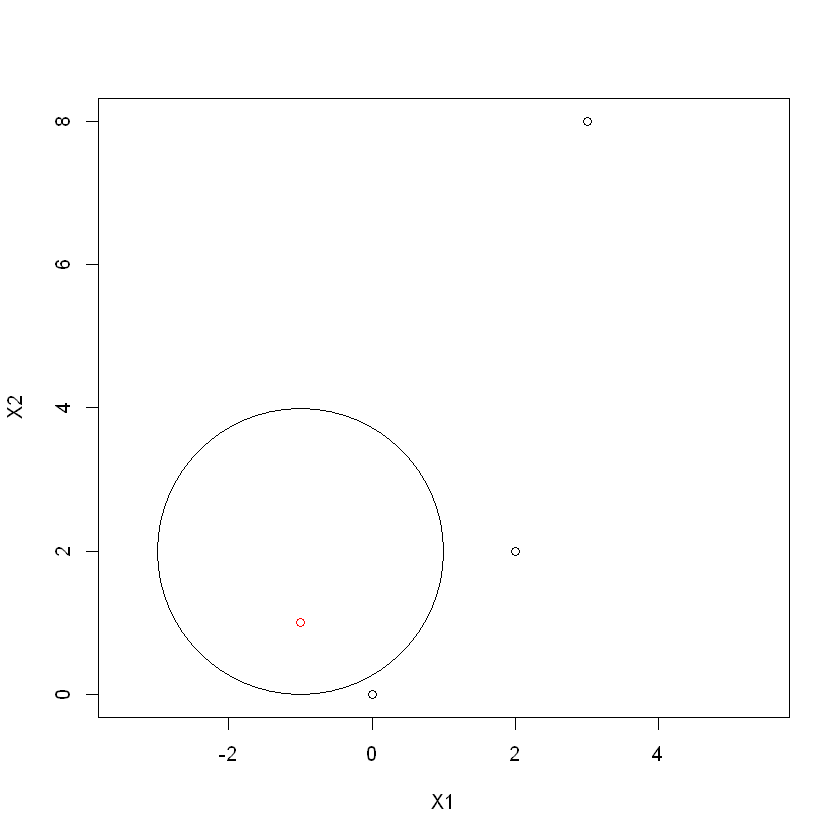

In [26]:
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("black", "red", "black", "black"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

#### d
- c

## Exercise 4


In [27]:
library(tibble)
set.seed(1234)
q4_data <- tibble(
    X1 = rnorm(100),
    X2 = rnorm(100)
)

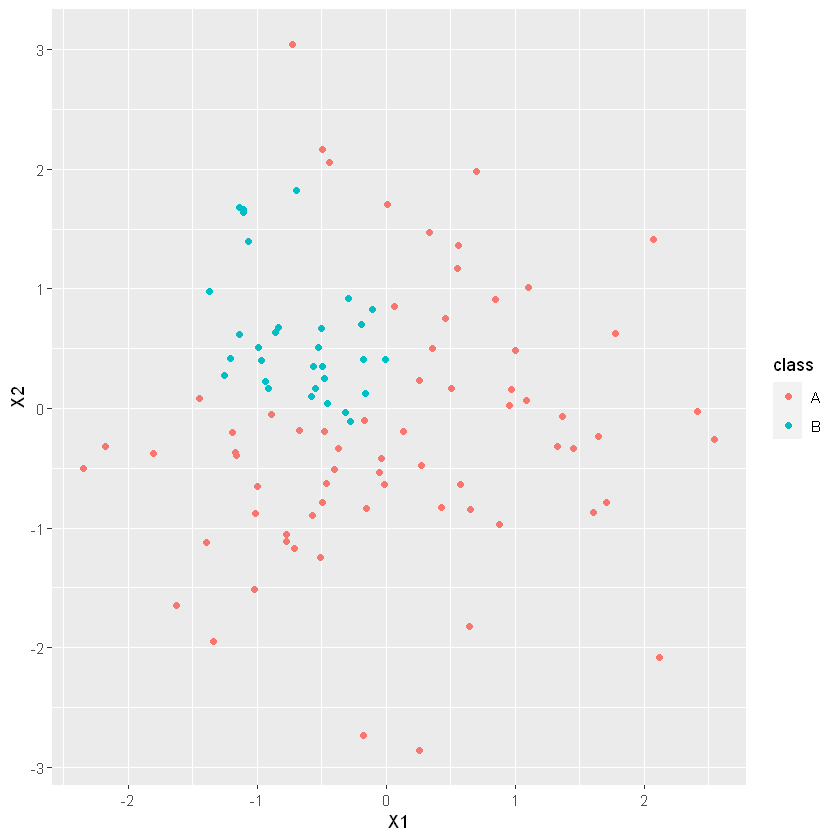

In [28]:
library(dplyr)
library(ggplot2)
q4_data %>%
    mutate(
        class = as.factor(ifelse(-X1 + X2 - (X1 + X2)^2 < 0, 'A', 'B'))
    ) -> q4_data_class

q4_data_class %>%
    ggplot() +
    geom_point(aes(X1, X2, colour = class))

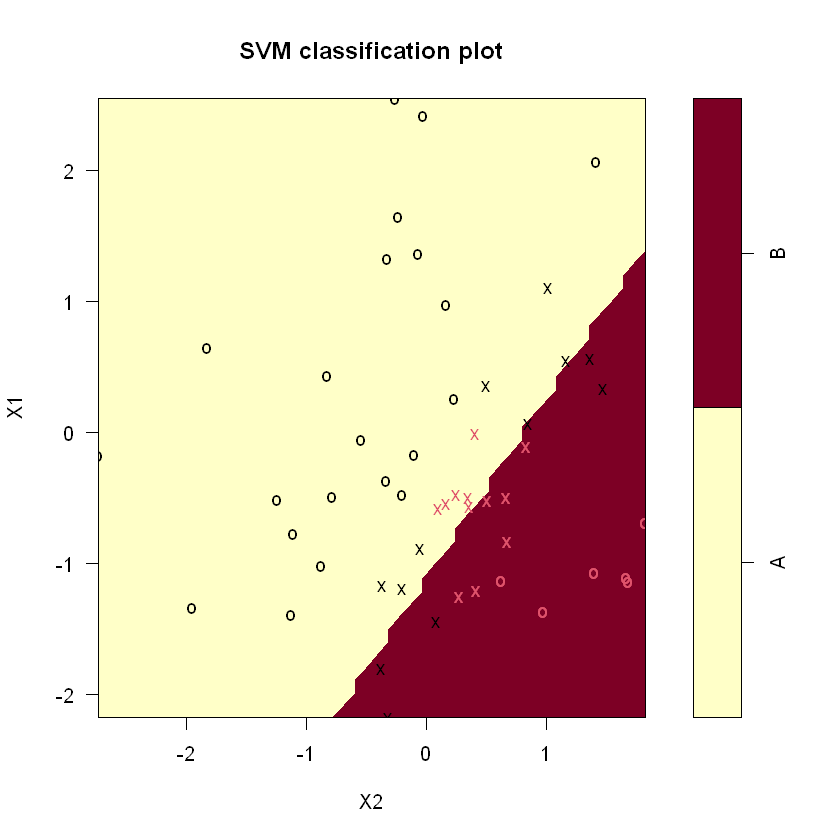

In [29]:
library(tidyverse)
library(modelr)
library(e1071)
set.seed(1)
q4_data_partition <- q4_data_class %>% resample_partition(c(test = .5, train = .5))

q4_data_partition$train %>%
    svm(class ~ ., data = ., scale = F, cost = 10, kernel = 'linear') -> svc_fit

svc_fit %>% plot(data = as_tibble(q4_data_partition$train))

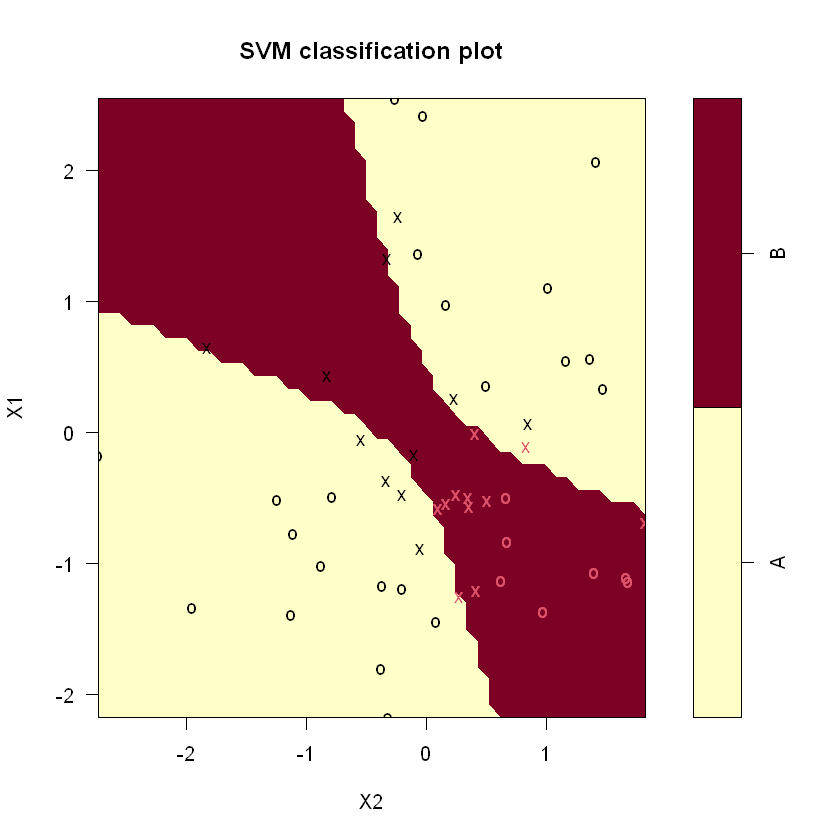

In [30]:
q4_data_partition$train %>%
        svm(class ~ ., data = ., scale = F, cost = 10, kernel = 'polynomial', degree = 2) -> svm_poly_fit

svm_poly_fit %>% plot(data = as_tibble(q4_data_partition$train))

In [45]:
q4_data_partition$test %>%
    as_tibble() %>%
    mutate(
        svc_pred = predict(svc_fit, newdata = .),
        svm_pred = predict(svm_poly_fit, newdata = .)
    )
    

X1,X2,class,svc_pred,svm_pred
<dbl>,<dbl>,<fct>,<fct>,<fct>
0.277429242,-0.47471847,A,A,B
1.084441177,0.06599349,A,A,A
-2.345697703,-0.50247778,A,B,A
0.506055892,0.16698928,A,A,A
-0.574739960,-0.89626463,A,A,A
-0.998386445,-0.64906975,A,A,A
0.959494059,0.02236253,A,A,A
-0.911195417,0.16902641,B,B,B
0.134088220,-0.19139217,A,A,B


## Exercise 7

#### a

In [33]:
library(ISLR)
mileage.median <- median(Auto$mpg)
Auto$mb <- ifelse(Auto$mpg > mileage.median, 1, 0)

#### b

In [34]:
set.seed(1234)
    Auto %>%
    tune(
        svm, mb ~ ., data = ., kernel = 'linear',
        ranges = list(cost = c(0.01, 0.1, 1, 10, 100))
    ) -> auto_svc

summary(auto_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.07424404 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.08379323 0.02362659
2 1e-01 0.07898470 0.02693908
3 1e+00 0.07424404 0.02693697
4 1e+01 0.08874314 0.03324316
5 1e+02 0.11389623 0.03717388


#### C

In [35]:
set.seed(1234)
Auto %>%
    tune(
        svm, mb ~ ., data = ., kernel = 'radial',
        ranges = list(gamma = c(0.01, 0.1, 1, 10, 100), cost = c(.01, .1, 1, 10))
    ) -> auto_svm_radial

summary(auto_svm_radial)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1   10

- best performance: 0.03603015 

- Detailed performance results:
   gamma  cost      error  dispersion
1  1e-02  0.01 0.25733598 0.042943476
2  1e-01  0.01 0.12806827 0.029973607
3  1e+00  0.01 0.47613370 0.045954932
4  1e+01  0.01 0.49584153 0.045100703
5  1e+02  0.01 0.49603148 0.045061523
6  1e-02  0.10 0.08384720 0.026511202
7  1e-01  0.10 0.05652882 0.023260366
8  1e+00  0.10 0.29229064 0.045751716
9  1e+01  0.10 0.45220311 0.041884820
10 1e+02  0.10 0.45397442 0.041767388
11 1e-02  1.00 0.07071661 0.030638130
12 1e-01  1.00 0.04647039 0.019851313
13 1e+00  1.00 0.09568791 0.012884273
14 1e+01  1.00 0.24452932 0.004774315
15 1e+02  1.00 0.25108075 0.002342840
16 1e-02 10.00 0.06104831 0.027850250
17 1e-01 10.00 0.03603015 0.010346862
18 1e+00 10.00 0.09761144 0.014469339
19 1e+01 10.00 0.24452912 0.004774168
20 1e+02 10.00 0.25108075 0.002342840


In [36]:
Auto %>%
    tune(
        svm, mb ~ ., data = ., kernel = 'polynomial',
        ranges = list(degree = seq(2, 5), cost = c(.01, .1, 1, 10))
    ) -> auto_svm_poly

summary(auto_svm_poly)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 degree cost
      2   10

- best performance: 0.297875 

- Detailed performance results:
   degree  cost     error dispersion
1       2  0.01 0.4911603 0.02685143
2       3  0.01 0.4913819 0.02678336
3       4  0.01 0.4914884 0.02676687
4       5  0.01 0.4914907 0.02676598
5       2  0.10 0.4881863 0.02763466
6       3  0.10 0.4904001 0.02694202
7       4  0.10 0.4914646 0.02677594
8       5  0.10 0.4914875 0.02676702
9       2  1.00 0.4594690 0.03713328
10      3  1.00 0.4806614 0.02859589
11      4  1.00 0.4912267 0.02686701
12      5  1.00 0.4914550 0.02677750
13      2 10.00 0.2978750 0.07861622
14      3 10.00 0.3933194 0.04698871
15      4 10.00 0.4888571 0.02781392
16      5 10.00 0.4911308 0.02688269


## Exercise 8

#### a


In [37]:
library(ISLR)
set.seed(1234)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

#### b

In [38]:
library(e1071)
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  437

 ( 219 218 )


Number of Classes:  2 

Levels: 
 CH MM




#### c

In [39]:
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 426  57
  MM  78 239

In [40]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 151  19
  MM  24  76

#### D

In [41]:
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", 
                ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.17 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17125 0.03866254
2   0.01778279 0.17250 0.04362084
3   0.03162278 0.17375 0.04466309
4   0.05623413 0.17625 0.04226652
5   0.10000000 0.17000 0.04297932
6   0.17782794 0.17250 0.04401704
7   0.31622777 0.17375 0.04016027
8   0.56234133 0.17375 0.04308019
9   1.00000000 0.17250 0.04401704
10  1.77827941 0.17500 0.04208127
11  3.16227766 0.17500 0.04208127
12  5.62341325 0.17500 0.04124790
13 10.00000000 0.17375 0.04185375


#### E

In [42]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 424  59
  MM  73 244

In [43]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 148  22
  MM  22  78